In [39]:
%load_ext autoreload
%autoreload 2

import sys
import time
import os
sys.path.insert(0, '../')

# import embedding methods
from embedding.bernoulli import Bernoulli
from embedding.kl import KL
from embedding.matrix_factorization import MatrixFactorization

# import evaluation methods
from evaluation import evaluate_link_prediction
from evaluation import evaluate_node_classification
from evaluation import evaluate_node_clustering
# 
# import utils
from utils import graph_util
from utils import plot_util
from utils import model_util

# visualization
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiment 1

The results of the current experiment are stored at experiments/results/2020_01_25_21_38
Matrix_Fatorization_adjacency_1_1

Node clustering evaluation has started...

0.21618622782442026
0.21606174870886238
0.2165270665125024
0.2165270665125024
0.2165270665125024
0.2165270665125024
0.21628599439652427
0.2165270665125024
0.2165270665125024
0.21654637156127843
Model evaluation took: 1.6593334674835205 seconds
Matrix_Fatorization_adjacency_2_1

Node clustering evaluation has started...

0.20654234925413195
0.20673789099663212
0.20679430291378254
0.20654234925413198
0.20794593632204494
0.20654234925413198
0.20794593632204497
0.20654234925413198
0.20794593632204497
0.20673789099663212
Model evaluation took: 1.6372253894805908 seconds
Matrix_Fatorization_adjacency_3_1

Node clustering evaluation has started...

0.19746400516076124
0.2039113160201807
0.2053295120844134
0.20369223288420985
0.2038877154203639
0.20301417873326447
0.2036922328842099
0.20369223288420985
0.2026775480344587
0.203692

0.1491864342248089
0.1491864342248089
0.1491864342248089
0.1491864342248089
0.1491864342248089
0.1491864342248089
Model evaluation took: 1.4810230731964111 seconds
Matrix_Fatorization_transition_4_1

Node clustering evaluation has started...

0.14196582121915688
0.1419658212191569
0.14196582121915688
0.1419658212191569
0.139945969595286
0.14196582121915688
0.14196582121915688
0.1419658212191569
0.139945969595286
0.1419658212191569
Model evaluation took: 1.5747778415679932 seconds
Matrix_Fatorization_transition_8_1

Node clustering evaluation has started...

0.1332217219888586
0.1895678414367326
0.18913121786588252
0.18913121786588247
0.19130500347236024
0.1891312178658825
0.19130500347236024
0.1891312178658825
0.1913050034723602
0.19130500347236024
Model evaluation took: 1.5642671585083008 seconds
Matrix_Fatorization_transition_12_1

Node clustering evaluation has started...

0.1264707038280669
0.12879316532235863
0.12674088365620872
0.13536233045273802
0.12674088365620875
0.1873291184

0.4291172516455492
0.4291172516455492
0.4291172516455492
0.429757038344364
Model evaluation took: 34.68833923339844 seconds
Matrix_Fatorization_NetMF_12_1

Node clustering evaluation has started...

0.2951199951688709
0.32630866526307695
0.36502723600385145
0.40297840899647563
0.34028714363968543
0.28584260612784385
0.3705915196074927
0.36719357007348447
0.43411356290986614
0.363568112246341
Model evaluation took: 34.60207772254944 seconds
Matrix_Fatorization_NetMF_16_1

Node clustering evaluation has started...

0.3048249766192895
0.39093379281466956
0.34150804584100247
0.34180016400301727
0.314483008773046
0.30145180735547894
0.3696031483899166
0.38133001964515373
0.33528640051580255
0.34423402716371765
Model evaluation took: 34.7584924697876 seconds
Matrix_Fatorization_NetMF_24_1

Node clustering evaluation has started...

0.3056855725555359
0.3189193731972248
0.1948479622360363
0.3246484836367324
0.30669229592176744
0.20106890913179856
0.2619756076415328
0.3140090434668863
0.347430

0.053305502078751676
0.05764505252840285
0.0582961369967122
0.04920423735351902
0.039326538398438506
0.05551686531475625
Model evaluation took: 1.380028486251831 seconds
Matrix_Fatorization_sum_power_tran_32_1

Node clustering evaluation has started...

0.05542735173953488
0.057872239618590955
0.05483273054644333
0.05001837867060959
0.051403399072583435
0.04924609036439612
0.05528931050556838
0.03341494966394305
0.05040434996132278
0.055122266914985986
Model evaluation took: 1.4764130115509033 seconds
Matrix_Fatorization_sum_power_tran_64_1

Node clustering evaluation has started...

0.05197146489515626
0.026582476371874005
0.03868135539632936
0.0373953122025297
0.02518574354046866
0.044565804803608264
0.0338093321212809
0.051434495897133684
0.026071020347327282
0.03241303598209698
Model evaluation took: 1.5790984630584717 seconds
Matrix_Fatorization_sum_power_tran_128_1

Node clustering evaluation has started...

0.0483156198270491
0.03689551411673389
0.02873463839854624
0.02212792539

AttributeError: 'MatrixFactorization' object has no attribute '_Mat'

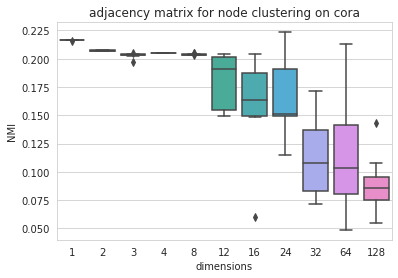

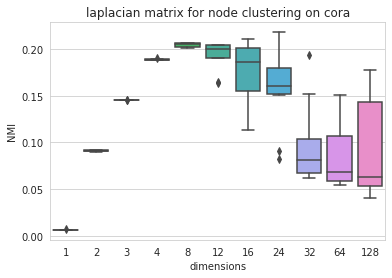

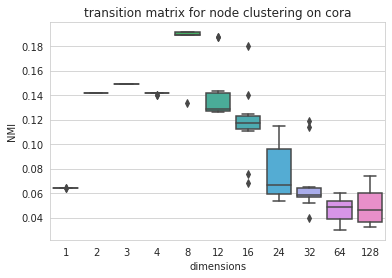

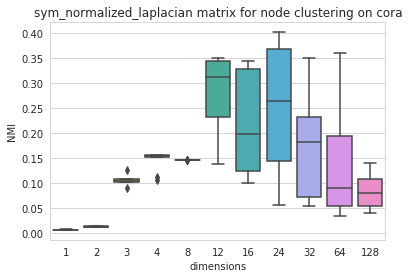

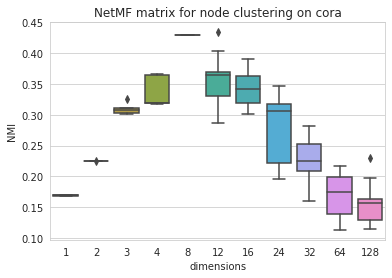

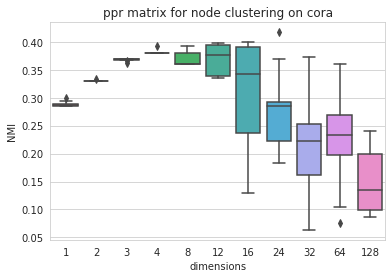

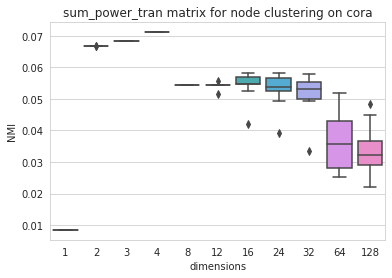

In [44]:
# Experiment 1

exp = {
    "max_epochs": 10000,
    "learning_rate": 1e-2, #Adam
    "weight_decay": 1e-7,
    
    "link_prediction":False,
    "link_pred_num_rounds": 10,
    "link_pred_train_ratio": 0.8,
    "link_pred_eval_every_n_steps": 20,
    "link_pred_edge_emb_method": "average",
    
    "node_classification": False,
    "node_class_num_rounds": 10,
    "node_class_train_ratio": 0.2,
    "node_class_eval_every_n_steps": 50,
    
    "node_clustering": True,
    "node_clustering_num_rounds": 10,
    "node_clustering_eval_epochs": 2,
}


datasets = ["cora","hvr","citeseer", "polblogs"]#, "cora",citeseer", "polblogs","hvr"] 


datasets = ["cora"]#, "cora",citeseer", "polblogs","hvr"] 






#TO DO:
#Laplacian (nobrainer) : Till done
#NetMF : Tillcd
#PPR : Till done(?)
#Sum_Power_Tran : Jan
#Sim_Rank : Jan
#Big Task: what to do with W / U Epsilon : Jan
#possible: Forest Fire / Stochastic Optimization
similarities= ['adjacency','laplacian','transition', 'sym_normalized_laplacian','NetMF','ppr','sum_power_tran']

for sim in similarities:


#Matrix Factorization
    model_1 = MatrixFactorization(embedding_dimension=1, similarity_measure=sim, embedding_option=1) 
    model_2 = MatrixFactorization(embedding_dimension=2, similarity_measure=sim, embedding_option=1) 
    model_3 = MatrixFactorization(embedding_dimension=3, similarity_measure=sim, embedding_option=1) 
    model_4 = MatrixFactorization(embedding_dimension=4, similarity_measure=sim, embedding_option=1) 
    model_8 = MatrixFactorization(embedding_dimension=8, similarity_measure=sim, embedding_option=1) 
    model_12 = MatrixFactorization(embedding_dimension=12, similarity_measure=sim, embedding_option=1) 
    model_16 = MatrixFactorization(embedding_dimension=16, similarity_measure=sim, embedding_option=1) 
    model_24 = MatrixFactorization(embedding_dimension=24, similarity_measure=sim, embedding_option=1) 
    model_32 = MatrixFactorization(embedding_dimension=32, similarity_measure=sim, embedding_option=1) 
    model_64 = MatrixFactorization(embedding_dimension=64, similarity_measure=sim, embedding_option=1) 
    model_128 = MatrixFactorization(embedding_dimension=128, similarity_measure=sim, embedding_option=1) 


    embedding_methods = [
    model_1,model_2,model_3,model_4,model_8, model_12, model_16, model_24, model_32, model_64,model_128
           ]


    dset_NMI=[]
    dset_AUC=[]
    dset_ACC=[]
# setup folders to store experiment setup summary and results
    result_folder = plot_util.setup_folders_and_summary_files(exp, datasets, embedding_methods)
    print(f'The results of the current experiment are stored at experiments/{result_folder}')

    for dataset in datasets:
    
    # load dataset
        total_NMI=[]
        total_AUC=[]
        total_ACC=[]
        A, y = graph_util.load_dataset(dataset)
    
        for model in embedding_methods:
        
            print(model.get_method_summary())
            start = time.time()
        
            directory= 'results_plot/'+dataset+'/'+str(model._method_name)
            if(not os.path.isdir(directory)):
                os.mkdir(directory)
        
        # do link prediction
            if(exp["link_prediction"]):
                link_prediction_folder = result_folder + "/link_prediction"
                AUC= evaluate_link_prediction.expLP(A,dataset,model,exp["link_pred_num_rounds"],
                                           link_prediction_folder, train_ratio=exp["link_pred_train_ratio"], 
                                           edge_emb_method=exp["link_pred_edge_emb_method"],train_epochs=exp["max_epochs"],
                                           eval_epochs=exp["link_pred_eval_every_n_steps"], undirected=True)
                total_AUC.append(AUC)
            
                if(not os.path.isdir(directory+'/link_prediction')):
                    os.mkdir(directory+'/link_prediction')
                
                with open(directory+'/link_prediction/'+str(model._similarity_measure)+'_AUC_results.txt','w') as f:
                    for listitem in AUC:
                        f.write('%s\n' % listitem) 
                    
        # do node classification
            if(exp["node_classification"]):
                node_classification_folder = result_folder + "/node_classification"
                ACC = evaluate_node_classification.expNC(A,y,dataset,model,exp["node_class_num_rounds"],
                                               node_classification_folder, train_ratio=exp["node_class_train_ratio"],
                                               train_epochs=exp["max_epochs"],eval_epochs=exp["node_class_eval_every_n_steps"],undirected=True)
                total_ACC.append(ACC)
            
                if(not os.path.isdir(directory+'/node_classification')):
                    os.mkdir(directory+'/node_classification')
                
                with open(directory+'/node_classification/'+str(model._similarity_measure)+'_ACC_results.txt','w') as f:
                    for listitem in ACC:
                        f.write('%s\n' % listitem) 
         
        # do node clustering
            if(exp["node_clustering"]):
                node_clustering_folder = result_folder + "/node_clustering"
                NMI = evaluate_node_clustering.exp_Node_Clustering(A,y,dataset,model,exp["node_clustering_num_rounds"],
                                           node_clustering_folder , train_epochs=exp["max_epochs"],
                                           eval_epochs=exp["node_clustering_eval_epochs"],undirected=True)
                total_NMI.append(NMI)
            
                if(not os.path.isdir(directory+'/node_clustering')):
                    os.mkdir(directory+'/node_clustering')
                
                with open(directory+'/node_clustering/'+str(model._similarity_measure)+'_NMI_results.txt','w') as f:
                    for listitem in NMI:
                        f.write('%s\n' % listitem)    
                    
            end = time.time()
            print(f'Model evaluation took: {end-start} seconds')
        
        dset_NMI.append(total_NMI)

    
    
    headers= [  
            '1','2','3','4','8', '12', '16', '24','32', '64', '128'
         ]

        

    if(exp["node_clustering"]):
    
        for ds,NMI in zip(datasets,dset_NMI):  
            with open('results_plot/'+ds+'/dset_NMI.txt', 'wb') as f:
                pickle.dump(NMI, f)
            
        for ds,NMI in zip(datasets,dset_NMI):
            plt.figure()
            sns_plot = sns.boxplot(x=headers, y=NMI,order=headers );
            plt.title(sim+" matrix for node clustering on "+ds)
            plt.xlabel("dimensions")
            plt.ylabel("NMI")
            sns_plot.figure.savefig('plots/'+ds+'/NMI_'+sim+'.png')
            
         
  
    
    if(exp["link_prediction"]):
    
        for ds,AUC in zip(datasets,dset_AUC):    
            with open('results_plot/'+ds+'/dset_AUC.txt', 'wb') as f:
                pickle.dump(AUC, f)
                
        for ds,AUC in zip(datasets,dset_AUC):
            plt.figure()
            sns_plot = sns.boxplot(x=headers, y=AUC);
            plt.title("Comparison for link prediction on "+ds)
            plt.xlabel("model")
            plt.ylabel("AUC")
            sns_plot.figure.savefig('plots/'+ds+'/AUC_'+sim+'.png')

    if(exp["node_classification"]):
    
        for ds,ACC in zip(datasets,dset_ACC):
            with open('results_plot/'+ds+'/dset_ACC.txt', 'wb') as f:
                pickle.dump(ACC, f)
            
        for ds,ACC in zip(datasets,dset_ACC):
            plt.figure()
            sns_plot = sns.boxplot(x=headers, y=ACC);
            plt.title(sim+" matrix for node clustering on "+ds)
            plt.xlabel("model")
            plt.ylabel("accuracy")
            sns_plot.figure.savefig('plots/'+ds+'/ACC_'+sim+'.png')
        
        

In [30]:
  
headers= [  
            'adj','lap','ftr','nl','nf', 'fppr', 'fspt'
         ]


import pickle


if(exp["node_clustering"]):
    
    for ds,NMI in zip(datasets,dset_NMI):  
        with open('results_plot_comparison/'+ds+'/dset_NMI.txt', 'wb') as f:
            pickle.dump(NMI, f)
            
    for ds,NMI in zip(datasets,dset_NMI):
        plt.figure()
        sns_plot = sns.boxplot(x=headers, y=NMI);
        plt.title("Comparison for node clustering on "+ds)
        plt.xlabel("model")
        plt.ylabel("NMI")
        plt.ylim([0.,1.])
        sns_plot.figure.savefig('plots/'+ds+'/NMI_'+ds+'.png')
        



FileNotFoundError: [Errno 2] No such file or directory: 'results_plot_comparison/cora/dset_NMI.txt'

In [ ]:

for ds,NMI in zip(datasets,dset_NMI):
    plt.figure()
    sns_plot = sns.boxplot(x=headers, y=NMI);
    plt.title("Comparison for node clustering on "+ds)
    plt.xlabel("model")
    plt.ylabel("NMI")
    plt.ylim([0.,1.])
    sns_plot.figure.savefig('plots/'+ds+'/NMI_'+ds+'.png')

In [ ]:
for ds,AUC in zip(datasets,dset_AUC):
    plt.figure()
    sns_plot = sns.boxplot(x=headers, y=AUC);
    plt.title("Comparison for link prediction on "+ds)
    plt.xlabel("model")
    plt.ylabel("AUC")
    plt.ylim([0.,1.])
    sns_plot.figure.savefig('plots/'+ds+'/AUC_'+ds+'.png')

In [ ]:
for ds,ACC in zip(datasets,dset_ACC):
    plt.figure()
    sns_plot = sns.boxplot(x=headers, y=ACC);
    plt.title("Comparison for node classification on "+ds)
    plt.xlabel("model")
    plt.ylabel("accuracy")
    plt.ylim([0.,1.])
    sns_plot.figure.savefig('plots/'+ds+'/ACC_'+ds+'.png')